In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import csv

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/anaconda3/envs/dlcv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0


In [2]:
# Hyperparameters
vocab_size = 1000
embedding_dim =16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 1750

In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [4]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv -O /tmp/bbc-text.csv

--2019-10-05 22:09:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com... 172.217.160.144
Connecting to storage.googleapis.com|172.217.160.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  1.11MB/s    in 4.4s    

2019-10-05 22:09:09 (1.10 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [5]:
sentences = []
labels = []
with open('/tmp/bbc-text.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)
        
print(len(labels))
print(len(sentences))
print(sentences[0])


2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [6]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [7]:
print(training_size)
print(len(training_sentences))
print(len(training_labels))
print(len(testing_sentences))
print(len(testing_labels))

1750
1750
1750
475
475


In [8]:
# create word vector
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
# create padded matrix of the sentences - sequences
train_sequences = tokenizer.texts_to_sequences(training_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [9]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [10]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_lable_seq = np.array(label_tokenizer.texts_to_sequences(training_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(testing_labels))

In [11]:
# build a model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# compile and summary the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 30
history = model.fit(train_padded, training_lable_seq, epochs=num_epochs, validation_data=(testing_padded, validation_label_seq), verbose=2)

Train on 1750 samples, validate on 475 samples
Epoch 1/30
1750/1750 - 1s - loss: 1.7646 - accuracy: 0.2417 - val_loss: 1.7322 - val_accuracy: 0.4295
Epoch 2/30
1750/1750 - 0s - loss: 1.6809 - accuracy: 0.5354 - val_loss: 1.6200 - val_accuracy: 0.5874
Epoch 3/30
1750/1750 - 0s - loss: 1.5461 - accuracy: 0.5440 - val_loss: 1.4691 - val_accuracy: 0.6063
Epoch 4/30
1750/1750 - 0s - loss: 1.3676 - accuracy: 0.6691 - val_loss: 1.2854 - val_accuracy: 0.7053
Epoch 5/30
1750/1750 - 0s - loss: 1.1560 - accuracy: 0.7491 - val_loss: 1.0815 - val_accuracy: 0.7305
Epoch 6/30
1750/1750 - 0s - loss: 0.9527 - accuracy: 0.8423 - val_loss: 0.9002 - val_accuracy: 0.7768
Epoch 7/30
1750/1750 - 0s - loss: 0.7726 - accuracy: 0.8554 - val_loss: 0.7552 - val_accuracy: 0.8632
Epoch 8/30
1750/1750 - 0s - loss: 0.6252 - accuracy: 0.9217 - val_loss: 0.6284 - val_accuracy: 0.9158
Epoch 9/30
1750/1750 - 0s - loss: 0.5062 - accuracy: 0.9383 - val_loss: 0.5300 - val_accuracy: 0.9305
Epoch 10/30
1750/1750 - 0s - loss: 

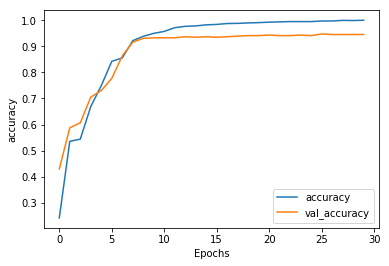

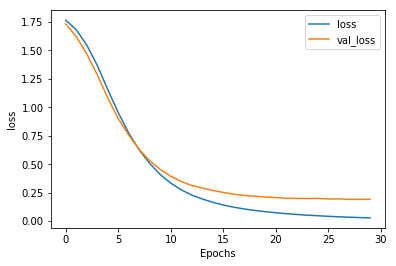

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")